# 02. Neural Network Classification with TensorFlow

## Date Loading and Preprocessing

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

2.19.0


### Loading and Preprocessing the Dataset

In [3]:
from sklearn.datasets import make_circles

X, y = make_circles(1000, random_state=42, noise=0.03)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
type(X)

numpy.ndarray

In [6]:
np.max(X)

np.float64(1.0360036756154805)

In [7]:
np.min(X)

np.float64(-1.0677683182718436)

In [ ]:
X.shape

(1000, 2)

In [9]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
y.shape

(1000,)

In [11]:
df = pd.DataFrame({
    "X_0":X[:,0],
    "X_1":X[:,1],
    "Target":y
})

In [12]:
df.head()

,X_0,X_1,Target
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
df['Target'].value_counts()

,count
Target,
1,500
0,500


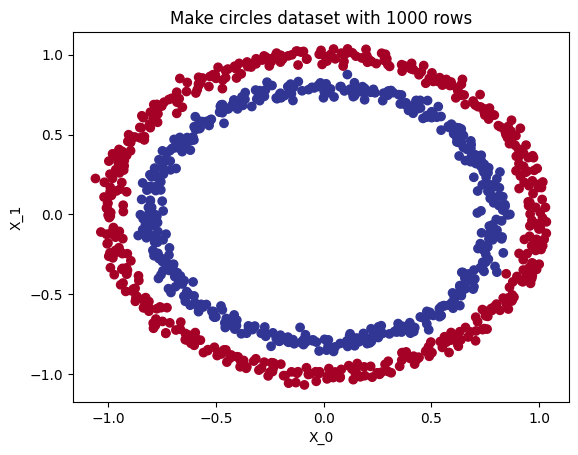

In [14]:
plt.scatter(df['X_0'], df['X_1'], c=df['Target'], cmap=plt.cm.RdYlBu)
plt.title("Make circles dataset with 1000 rows")
plt.xlabel("X_0")
plt.ylabel("X_1")
plt.show()

In [ ]:
X[0]

array([0.75424625, 0.23148074])

In [ ]:
X.ndim

2

In [ ]:
y[0]

np.int64(1)

### Plot Loss Function and Plot Accuracy Function and Plot Decision Boundary Function

In [287]:
def plot_loss(history,title="Training Loss"):
    plt.plot(history.history['loss'])
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss") 
    plt.show()

def plot_accuracy(history,title="Training Accuracy"): 
    plt.plot(history.history['accuracy'])
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.title(title)
    plt.show()

def plot_mae(history,title="Training Mean Absolute Error"): 
    plt.plot(history.history['mae'])
    plt.xlabel("epochs")
    plt.ylabel("mae")
    plt.title(title)
    plt.legend()
    plt.show()

def plot_loss_val_loss(history,title="Training vs Validation Loss"):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_accuracy_val_accuracy(history,title="Training vs Validation Accuracy"):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

## Models Building, Training and Evaluating

### Model 1: A simple neural network with 1 dense layer

In [35]:
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(1)
    ]
)

In [36]:
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

In [37]:
model_1.fit(X, y, epochs=10, verbose=0)

In [38]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4827 - loss: 5.5688  


[5.592574596405029, 0.4959999918937683]

In [39]:
history_1 = model_1.fit(X, y, epochs=100, verbose=0)

In [40]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6930 


[0.6932463645935059, 0.5]

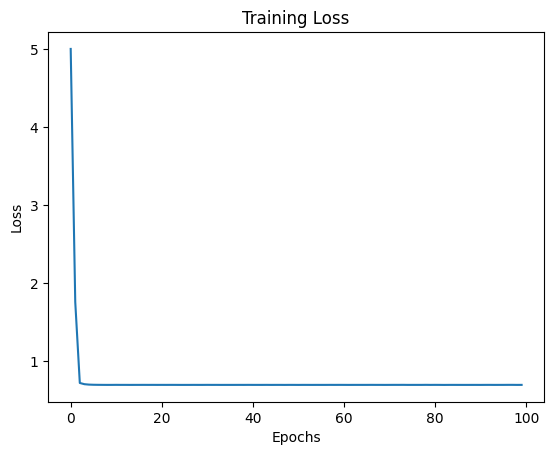

In [41]:
plot_loss(history_1)

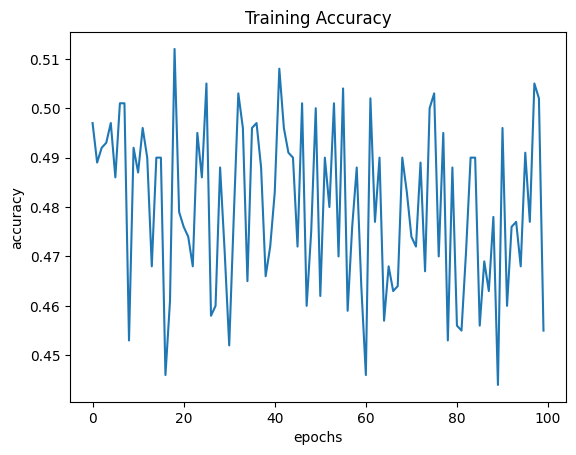

In [42]:
plot_accuracy(history_1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
doing binary classifcation...


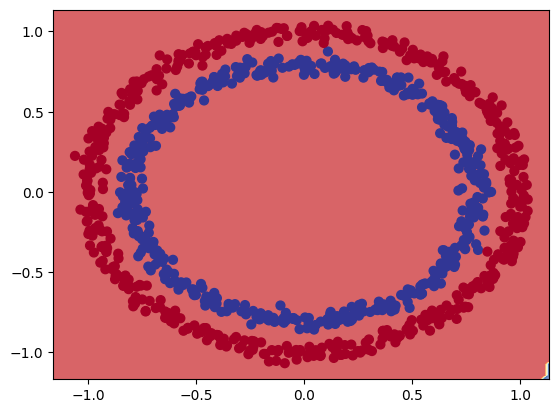

In [43]:
plot_decision_boundary(model_1, X, y)

---

### Model 2: with 2 dense layers

In [44]:
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)

In [45]:
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

In [46]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
history_2 = model_2.fit(X, y, epochs=10, verbose=0)

In [48]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5062 - loss: 0.6916  


[0.6970586776733398, 0.49000000953674316]

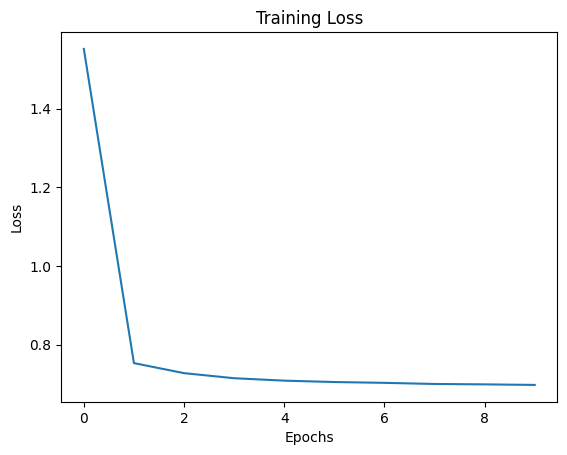

In [49]:
plot_loss(history_2)

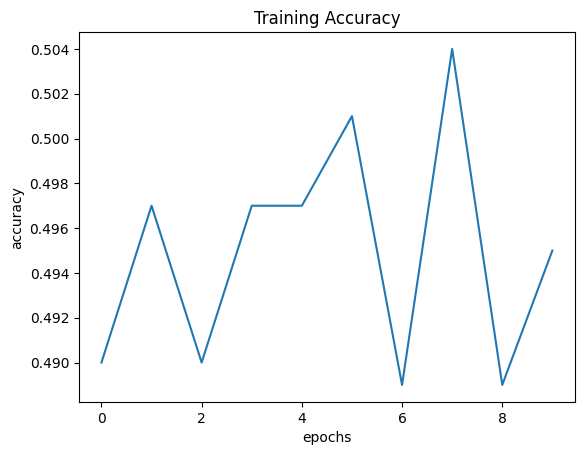

In [50]:
plot_accuracy(history_2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


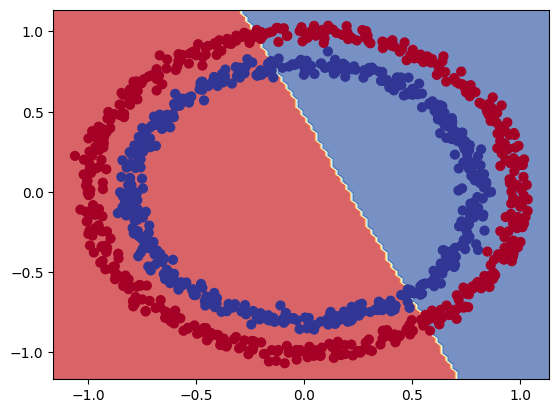

In [51]:
plot_decision_boundary(model_2, X, y)

---

### Model 3: with 3 Dense Layers for Classification

In [52]:
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

In [53]:
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [54]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,321 (5.16 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history_3 = model_3.fit(X, y,epochs=100, verbose=0)

In [56]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4796 - loss: 0.6929


[0.6937332153320312, 0.460999995470047]

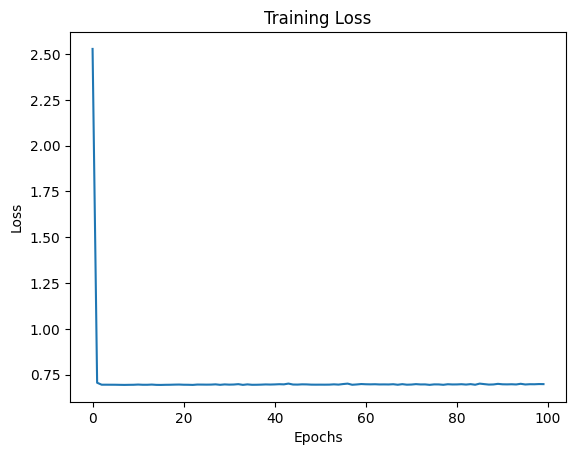

In [57]:
plot_loss(history_3)

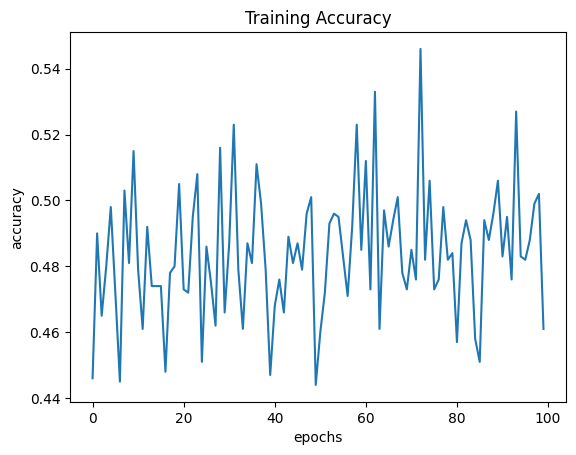

In [58]:
plot_accuracy(history_3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


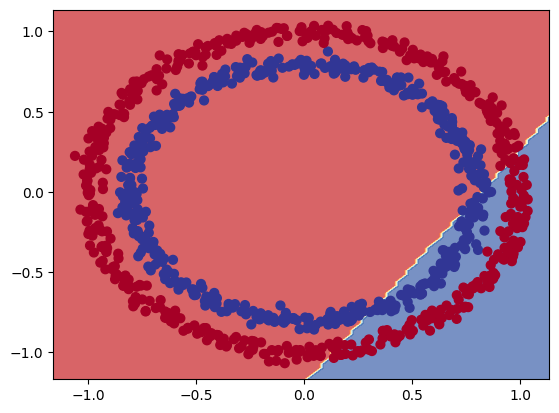

In [59]:
plot_decision_boundary(model_3, X, y)

### Model 4: with 3 Dense Layers for Regression

In [60]:
model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
    ]
)

In [61]:
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

In [62]:
history_4 = model_4.fit(X, y, epochs=100,verbose=0)


In [63]:
model_4.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5023 - mae: 0.5023  


[0.4999685287475586, 0.4999685287475586]

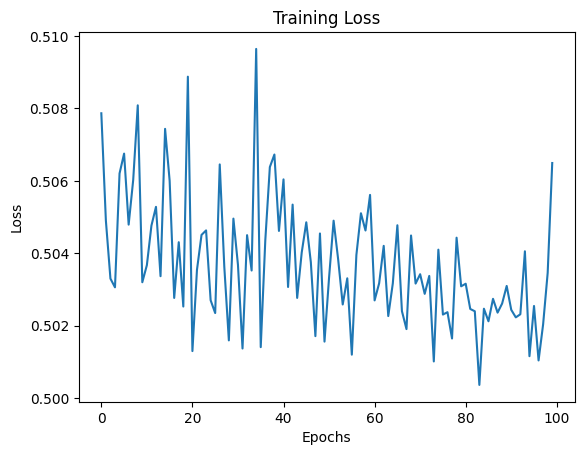

In [64]:
plot_loss(history_4)

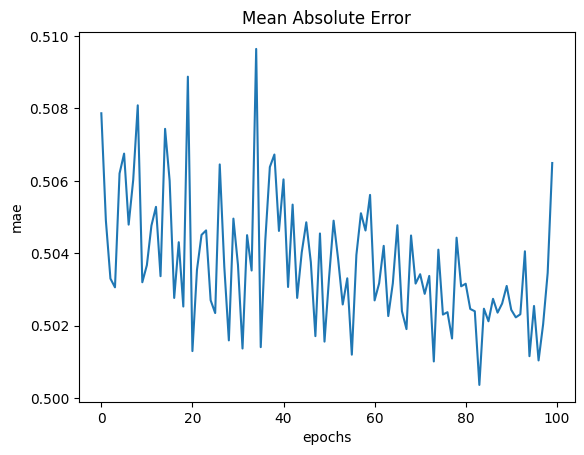

In [65]:
plt.plot(history_4.history['mae'],label='mae')
plt.xlabel("epochs")
plt.ylabel("mae")
plt.title("Mean Absolute Error")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


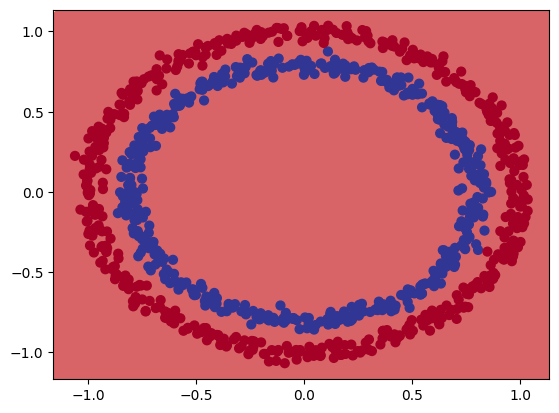

In [66]:
plot_decision_boundary(model_4, X, y)

### Model 5: with 1 hidden layer and Linear Activation

In [174]:
model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
        tf.keras.layers.Dense(1)
    ]
)

In [175]:
model_5.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [176]:
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

In [ ]:
history_5 = model_5.fit(X, y, epochs=100, verbose=0)

In [178]:
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4131 - loss: 0.6932  


[0.6931471824645996, 0.44200000166893005]

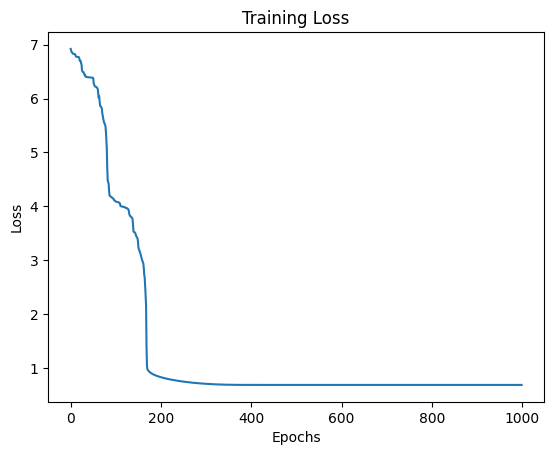

In [179]:
plot_loss(history_5)

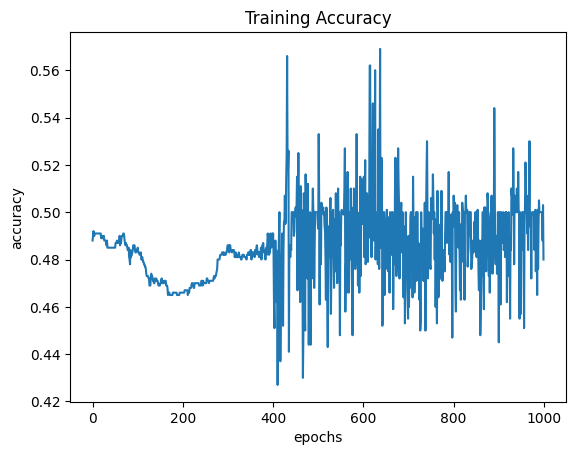

In [180]:
plot_accuracy(history_5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


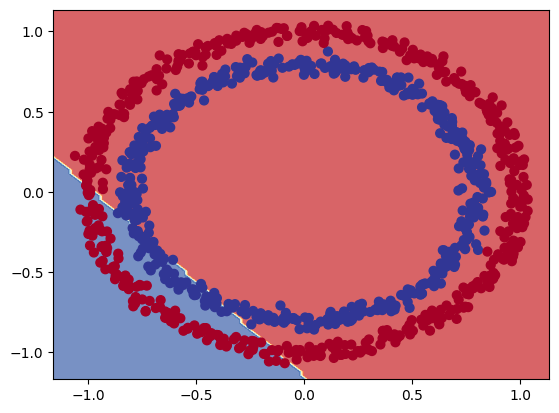

In [181]:
plot_decision_boundary(model_5, X, y)

In [182]:
model_5.optimizer.learning_rate

<Variable path=adam/learning_rate, shape=(), dtype=float32, value=0.0010000000474974513>

---

### Model 6: with 1 hidden layers and ReLU Activation

In [211]:
model_6 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1)
    ]
)

In [212]:
model_6.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [213]:
model_6.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [214]:
history_6 = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4930 - loss: 8.1726    
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4792 - loss: 8.3942 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5109 - loss: 7.8835 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5065 - loss: 7.9544 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4864 - loss: 8.2789 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4935 - loss: 8.1640 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 8.0592 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5171 - loss: 7.7840 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 7.9345 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4961 - loss: 8.1223 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5162 - loss: 7.7980 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [215]:
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

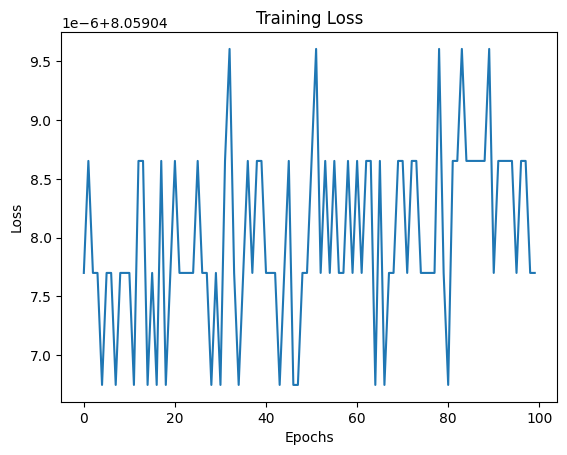

In [216]:
plot_loss(history_6)

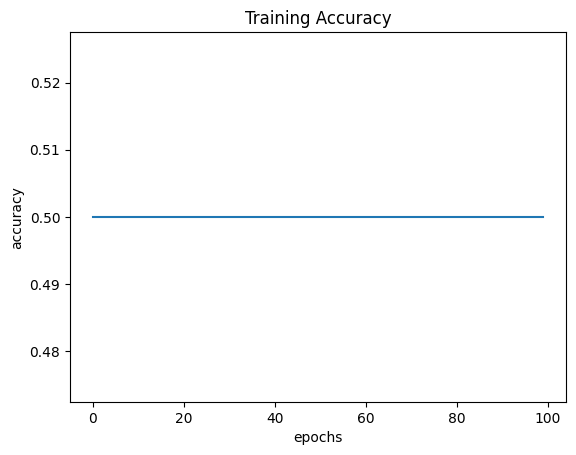

In [217]:
plot_accuracy(history_6)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
doing binary classifcation...


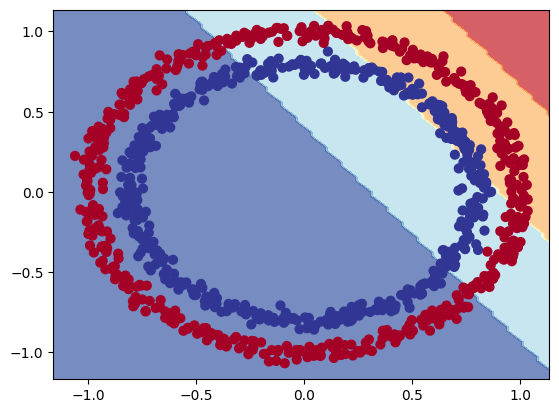

In [218]:
plot_decision_boundary(model_6, X, y)

### Model 7: with 2 hidden layers and ReLU Activation

In [277]:
model_7 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1)
    ]
)

In [278]:
model_7.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [279]:
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
history_7 = model_7.fit(X, y, epochs=100, verbose=0)

In [281]:
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0141


[0.015122935175895691, 0.996999979019165]

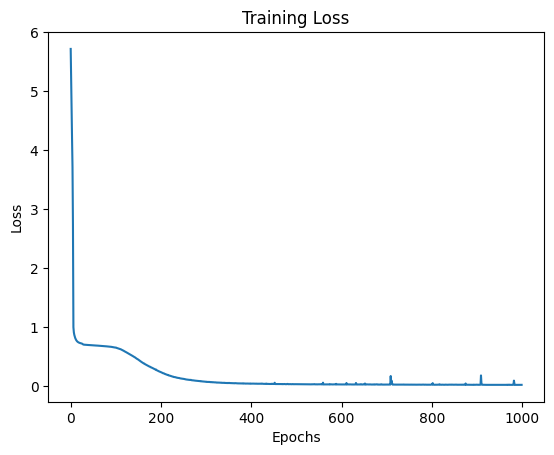

In [282]:
plot_loss(history_7)

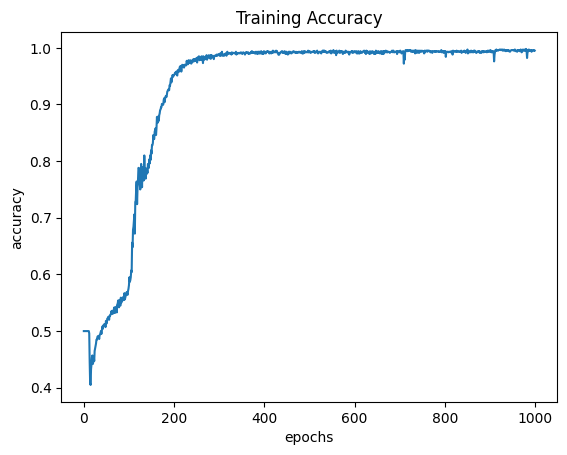

In [283]:
plot_accuracy(history_7)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


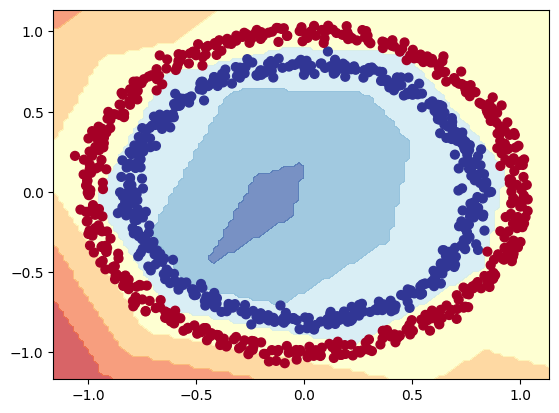

In [284]:
plot_decision_boundary(model_7, X, y)

---

### Model 8: with 2 hidden layers and Relu Activation and Sigmoid Output Activation

In [285]:
model_8 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [286]:
model_8.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [287]:
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [288]:
history_8 = model_8.fit(X, y, epochs=100, verbose=0)

In [292]:
model_8.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9710 - loss: 0.2688


[0.265733003616333, 0.9779999852180481]

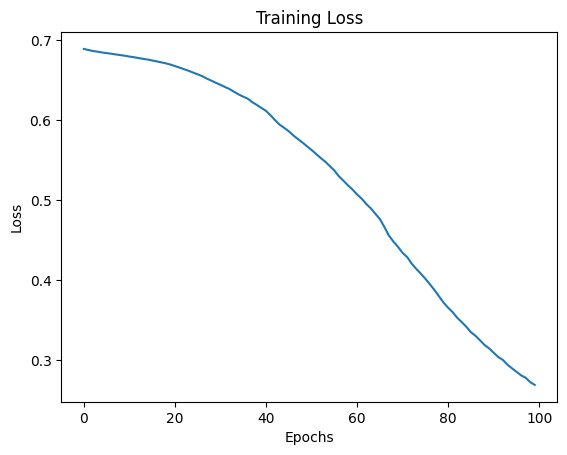

In [289]:
plot_loss(history_8)

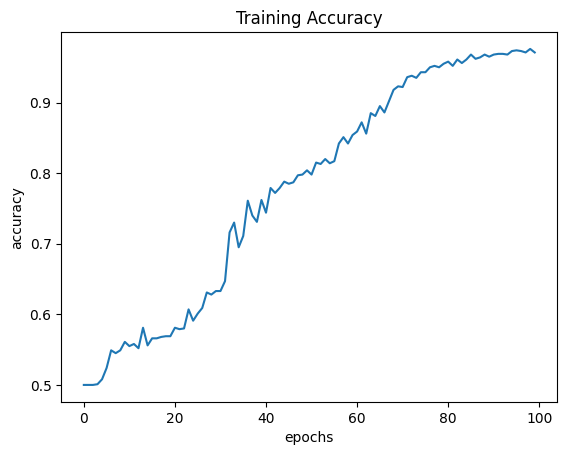

In [290]:
plot_accuracy(history_8)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


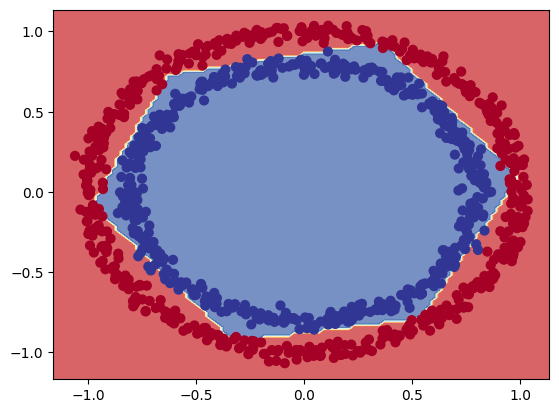

In [291]:
plot_decision_boundary(model_8, X, y)

---

## Activation Function

In [20]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

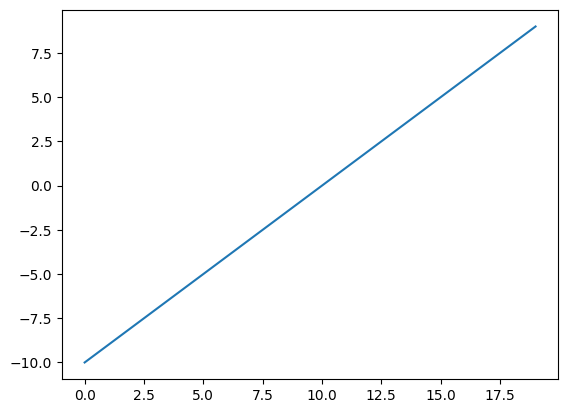

In [22]:
plt.plot(A)
plt.show()

In [26]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

In [27]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

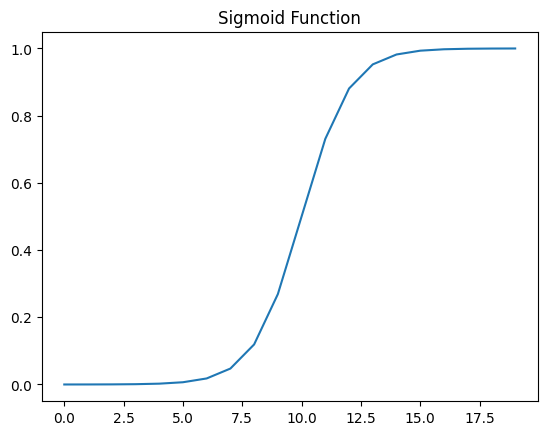

In [30]:
plt.plot(sigmoid(A))
plt.title("Sigmoid Function")
plt.show()

In [31]:
def relu(x):
    return tf.maximum(0, x)

In [32]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

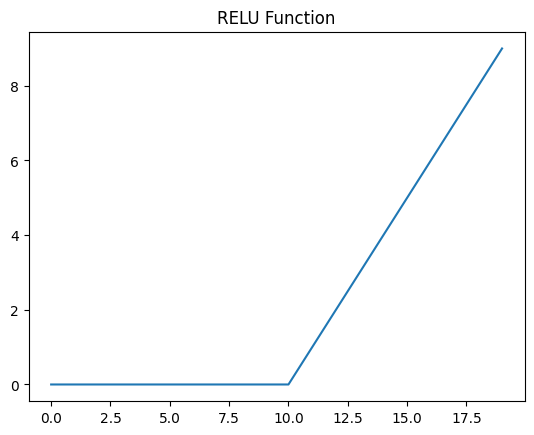

In [33]:
plt.plot(relu(A))
plt.title("RELU Function")
plt.show()

In [34]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [35]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [36]:
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397861e-05, 1.2339458e-04, 3.3535008e-04, 9.1105123e-04,
       2.4726230e-03, 6.6928524e-03, 1.7986210e-02, 4.7425866e-02,
       1.1920294e-01, 2.6894140e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

In [37]:
tf.keras.activations.relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

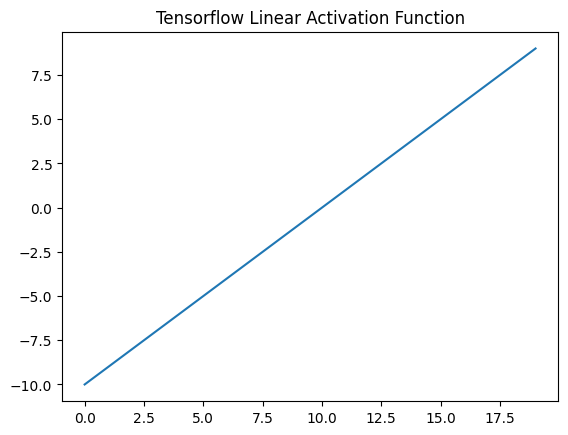

In [38]:
plt.plot(tf.keras.activations.linear(A))
plt.title("Tensorflow Linear Activation Function")
plt.show()

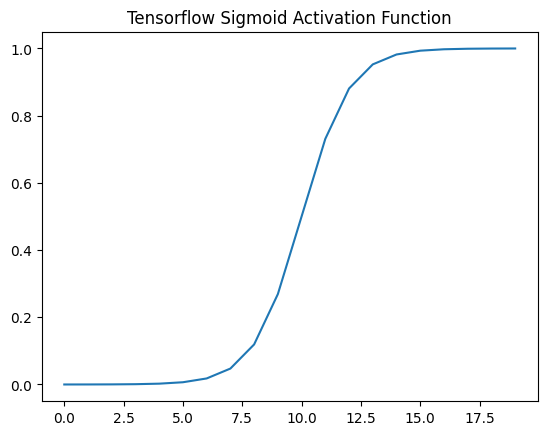

In [39]:
plt.plot(tf.keras.activations.sigmoid(A))
plt.title("Tensorflow Sigmoid Activation Function")
plt.show()

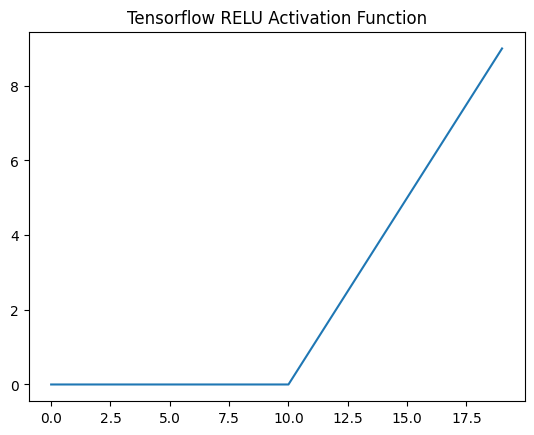

In [40]:
plt.plot(tf.keras.activations.relu(A))
plt.title("Tensorflow RELU Activation Function")
plt.show()

## Evaluating and improving our classification model

### Splitting data into training and test sets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
X_train.shape

(800, 2)

In [22]:
X_test.shape

(200, 2)

In [23]:
y_train.shape

(800,)

In [24]:
y_test.shape

(200,)

### Model 9: with 2 hidden layers and Relu Activation and Sigmoid Activation on Output Layer and Evaluation on Test Set

In [41]:
model_9 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [42]:
model_9.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_9.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [44]:
history_9 = model_9.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.2)

In [45]:
model_9.evaluate(X_train, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6102 - loss: 0.6192 


[0.6202430129051208, 0.6175000071525574]

In [46]:
model_9.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5341 - loss: 0.6635


[0.6504302024841309, 0.5649999976158142]

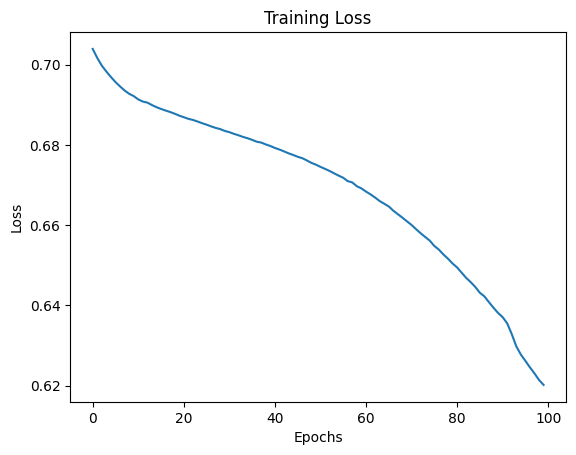

In [47]:
plot_loss(history_9)

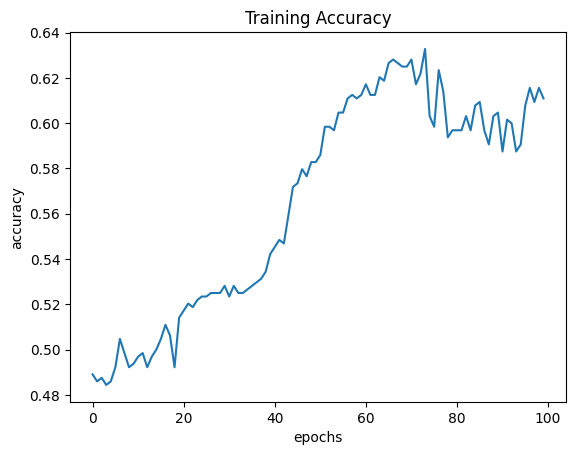

In [48]:
plot_accuracy(history_9)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


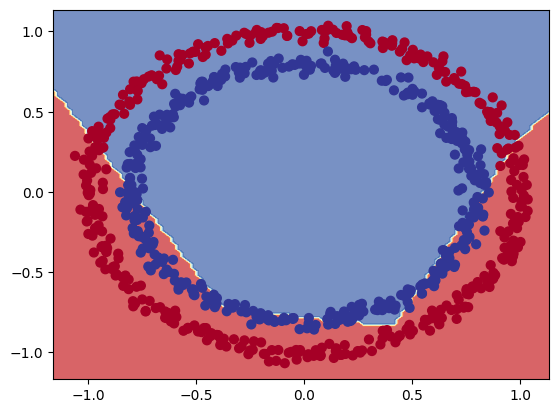

In [49]:
plot_decision_boundary(model_9, X_train, y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


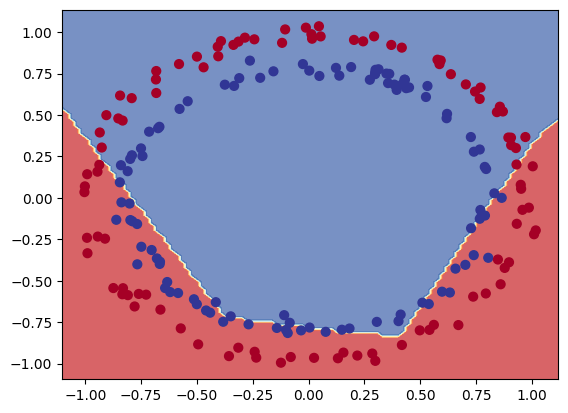

In [50]:
plot_decision_boundary(model_9, X_test, y_test)

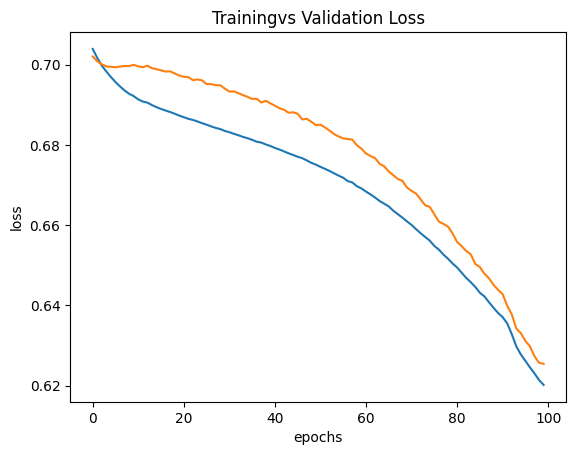

In [51]:
plot_loss_val_loss(history_9)

In [52]:
pd.DataFrame(history_9.history)

,accuracy,loss,val_accuracy,val_loss
0,0.489062,0.703919,0.52500,0.702027
1,0.485938,0.701679,0.50625,0.700832
2,0.487500,0.699753,0.47500,0.700087
3,0.484375,0.698277,0.45000,0.699564
4,0.485938,0.696919,0.44375,0.699472
...,...,...,...,...
95,0.607813,0.626166,0.61875,0.631126
96,0.615625,0.624536,0.58750,0.629787
97,0.609375,0.623034,0.58750,0.627304
98,0.615625,0.621391,0.61875,0.625693


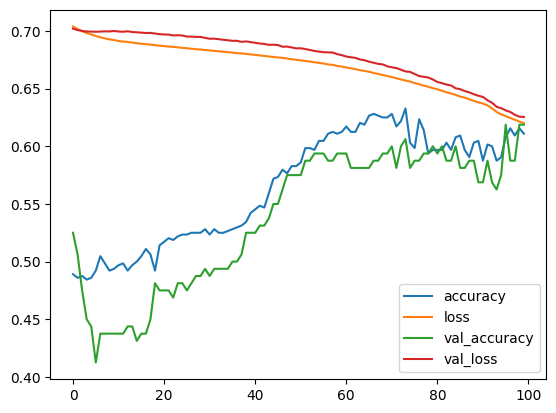

In [53]:
pd.DataFrame(history_9.history).plot()
plt.show()

### Model 10: with 2 hidden layers and Relu Activation and Sigmoid Activation on Output Layer with Learning Rate Scheduler Callback

In [59]:
model_10 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [60]:
model_10.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
model_10.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [62]:
history_10 = model_10.fit(
    X_train, y_train, epochs=100,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-4 * 10**(epoch/20)
    )], verbose=0
)

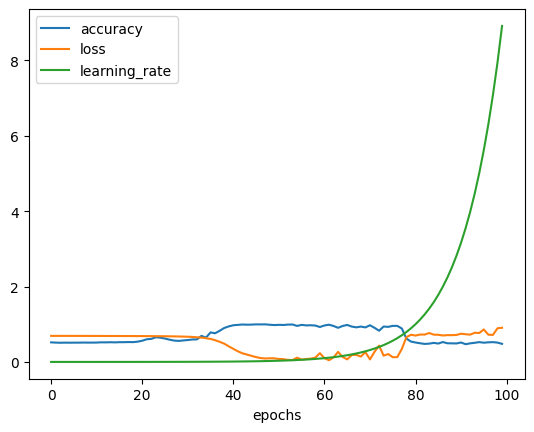

In [64]:
pd.DataFrame(history_10.history).plot(xlabel='epochs')
plt.show()

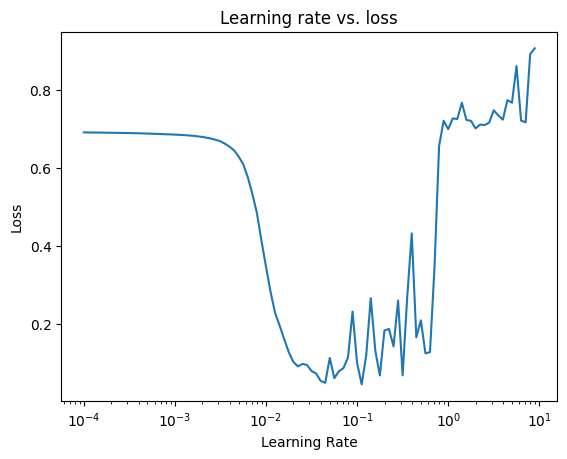

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.semilogx(lrs, history_10.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

### Model 11: with learning rate of 0.02

In [221]:
model_11 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [222]:
model_11.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [223]:
model_11.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.02),
    metrics=['accuracy']
)

In [224]:
history_11 = model_11.fit(X_train, y_train, epochs=20, verbose=0)

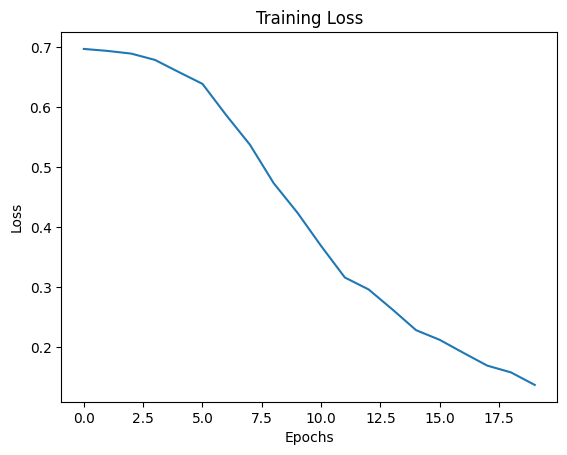

In [225]:
plot_loss(history_11)

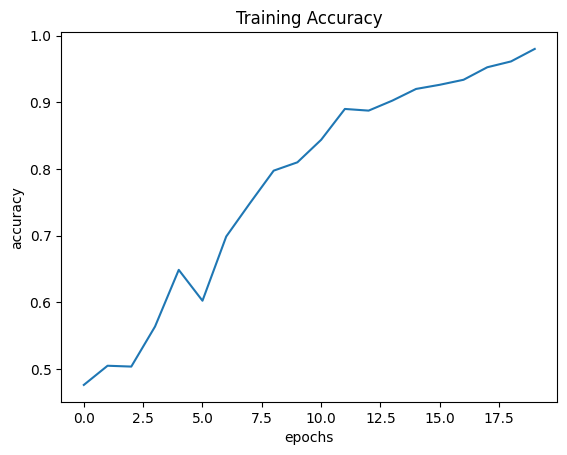

In [226]:
plot_accuracy(history_11)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


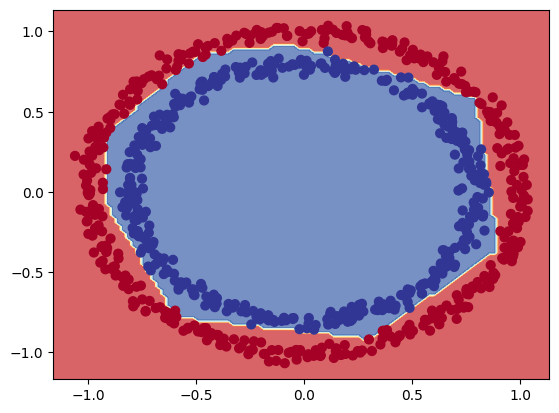

In [227]:
plot_decision_boundary(model_11, X_train, y_train)

 90/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


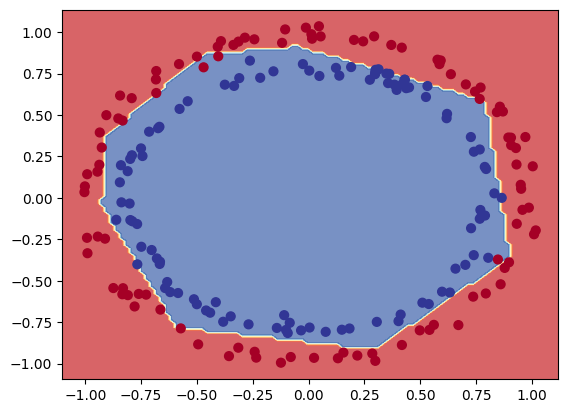

In [228]:
plot_decision_boundary(model_11,X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


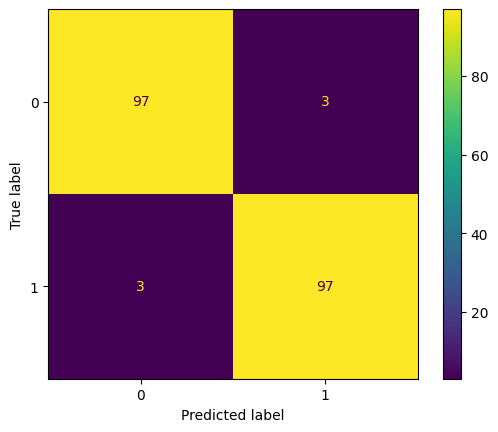

In [229]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = model_11.predict(X_test)
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, tf.round(y_pred))
).plot()
plt.show()

## Multi-class Classification Example with Fashion MNIST Dataset

### Loading the dataset

In [230]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [232]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [240]:
y_train[1]

np.uint8(0)

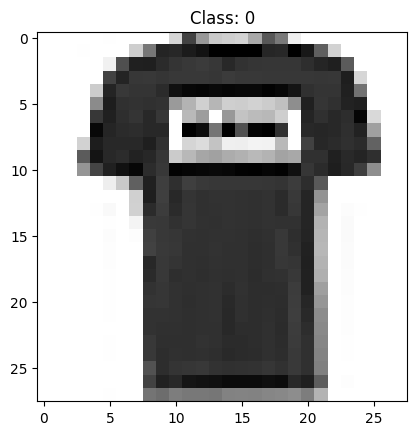

In [244]:
# plot image of first training example
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.title(f"Class: {y_train[1]}")
plt.show()

In [245]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

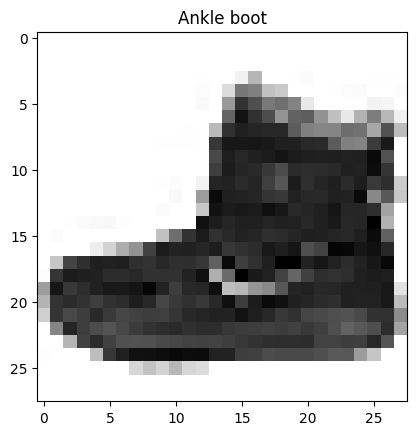

In [257]:
plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.title(class_names[y_train[i]])
plt.show()

### Model 12: without normalization of data

In [259]:
model_12 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [260]:
model_12.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,210 (12.54 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

In [261]:
model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [262]:
history_12 = model_12.fit(
    X_train, y_train, epochs=10, validation_data=(X_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1295 - loss: 2.6468 - val_accuracy: 0.1850 - val_loss: 2.1016
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2112 - loss: 1.9446 - val_accuracy: 0.2612 - val_loss: 1.7109
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2539 - loss: 1.6828 - val_accuracy: 0.2995 - val_loss: 1.6380
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3145 - loss: 1.6005 - val_accuracy: 0.3409 - val_loss: 1.5438
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3505 - loss: 1.5236 - val_accuracy: 0.3478 - val_loss: 1.5049
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3623 - loss: 1.4762 - val_accuracy: 0.4040 - val_loss: 1.3968
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4154 - loss: 1.3710 - val_accuracy: 0.4320 - val_loss: 1.3302
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4324 - loss: 1.3213 - 

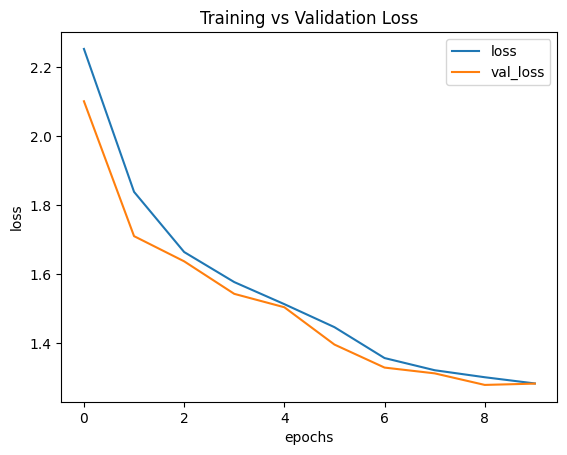

In [265]:
plot_loss_val_loss(history_12)

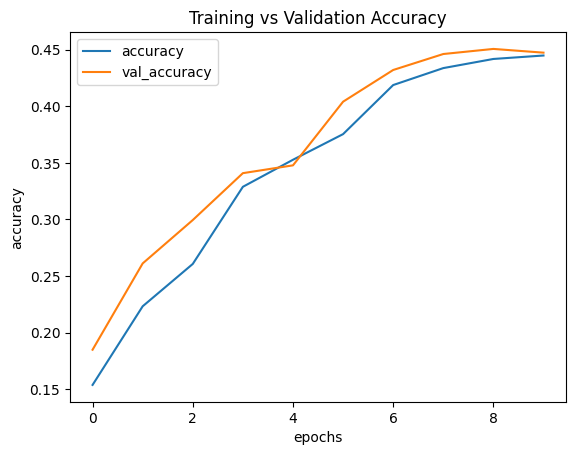

In [266]:
plot_accuracy_val_accuracy(history_12)

### Model 13: with normalization of data

In [270]:
X_train.max(),X_train.min()

(np.uint8(255), np.uint8(0))

In [272]:
X_train = X_train / 255
X_test = X_test /  255

In [273]:
X_train.max(), X_train.min()

(np.float64(1.0), np.float64(0.0))

In [274]:
X_test.max(), X_test.min()

(np.float64(1.0), np.float64(0.0))

In [275]:
model_13 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [276]:
model_13.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,210 (12.54 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

In [277]:
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [278]:
history_13 = model_13.fit(
    X_train, y_train, epochs=10, validation_data=(X_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3035 - loss: 1.7806 - val_accuracy: 0.6356 - val_loss: 0.9965
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6703 - loss: 0.9299 - val_accuracy: 0.7076 - val_loss: 0.8205
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7117 - loss: 0.7974 - val_accuracy: 0.7215 - val_loss: 0.7701
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7285 - loss: 0.7455 - val_accuracy: 0.7298 - val_loss: 0.7478
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7352 - loss: 0.7183 - val_accuracy: 0.7296 - val_loss: 0.7445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7415 - loss: 0.7097 - val_accuracy: 0.7352 - val_loss: 0.7331
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7414 - loss: 0.7011 - val_accuracy: 0.7403 - val_loss: 0.7224
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7441 - loss: 0.6953 - 

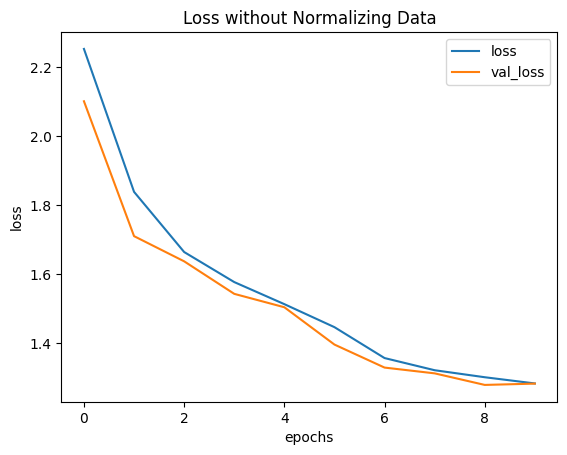

In [291]:
plot_loss_val_loss(history_12,title='Loss without Normalizing Data')

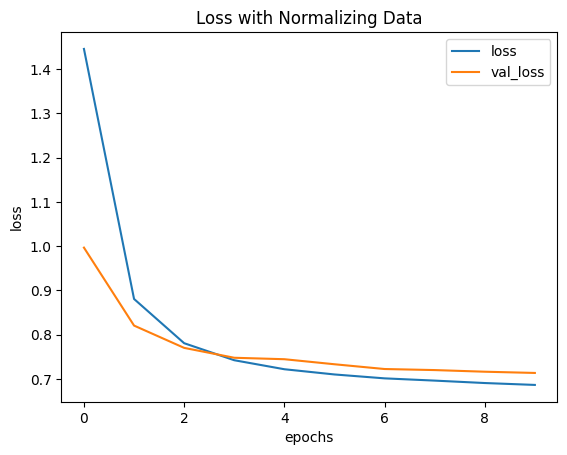

In [292]:
plot_loss_val_loss(history_13,title='Loss with Normalizing Data')

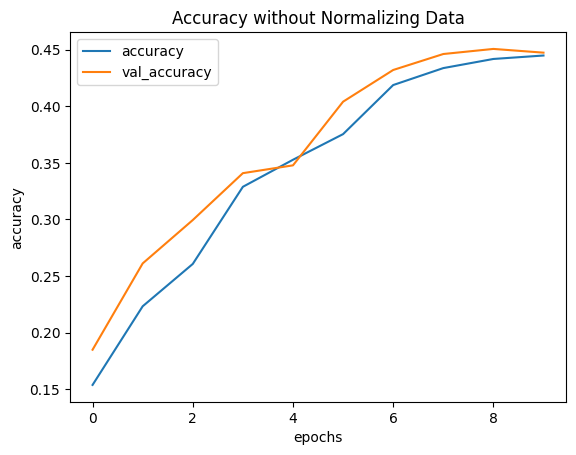

In [293]:
plot_accuracy_val_accuracy(history_12,title='Accuracy without Normalizing Data')

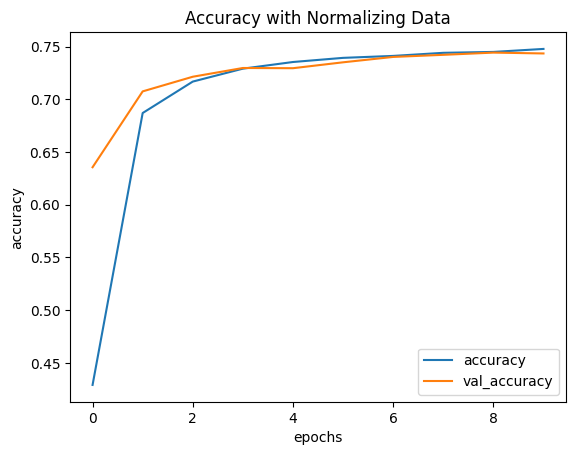

In [294]:
plot_accuracy_val_accuracy(history_13,title='Accuracy with Normalizing Data')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


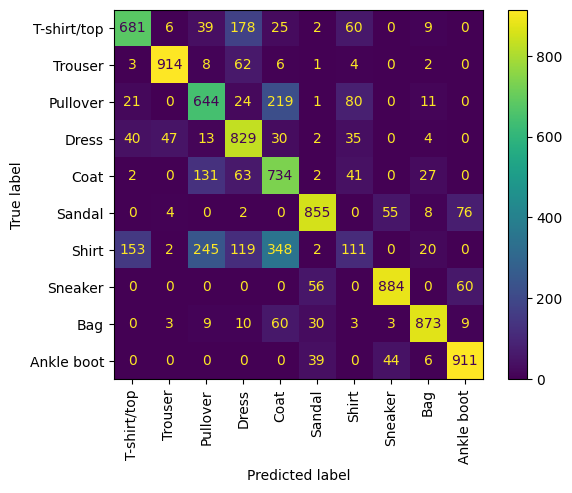

In [327]:
y_pred = model_13.predict(X_test)
y_pred = y_pred.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=class_names
).plot()
plt.xticks(rotation=90)
plt.show()

In [321]:
def classification_metrics(y_true, y_pred):
    accuracy = tf.keras.metrics.Accuracy()(y_true, y_pred).numpy()
    print(f"Accuracy Score: {accuracy*100:.2f}%")

    precision = tf.keras.metrics.Precision()(y_true, y_pred).numpy()
    print(f"Precision: {precision*100:.2f}%")

    recall = tf.keras.metrics.Recall()(y_true, y_pred).numpy()
    print(f"Recall: {recall*100:.2f}%")


In [322]:
classification_metrics(y_test, y_pred)

Accuracy Score: 74.36%
Precision: 96.49%
Recall: 97.57%


In [320]:
tf.keras.metrics.Accuracy()(y_test, y_pred).numpy()

np.float32(0.7436)

In [328]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


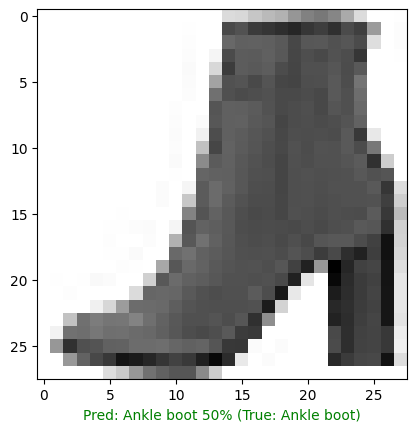

In [341]:
plot_random_image(model_13, X_test, y_test, class_names)

In [342]:
model_13.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_66, built=True>,
 <Dense name=dense_67, built=True>,
 <Dense name=dense_68, built=True>]

In [343]:
weights, _ = model_13.layers[1].get_weights()

In [344]:
weights

array([[-0.0969463 , -0.34334567,  0.0009968 , -0.067908  ],
       [ 0.04269005, -0.7688967 ,  0.02254871, -0.05983249],
       [ 0.76190656, -0.85138947, -0.04414133,  0.06705141],
       ...,
       [-0.01164465, -0.17988649,  0.07667112, -0.0124838 ],
       [-0.06457449, -0.22334248, -0.04057303, -0.07314452],
       [ 0.5011306 , -0.43824828,  0.0857542 , -0.02160542]],
      dtype=float32)

In [345]:
weights.shape

(784, 4)

In [346]:
model_13.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

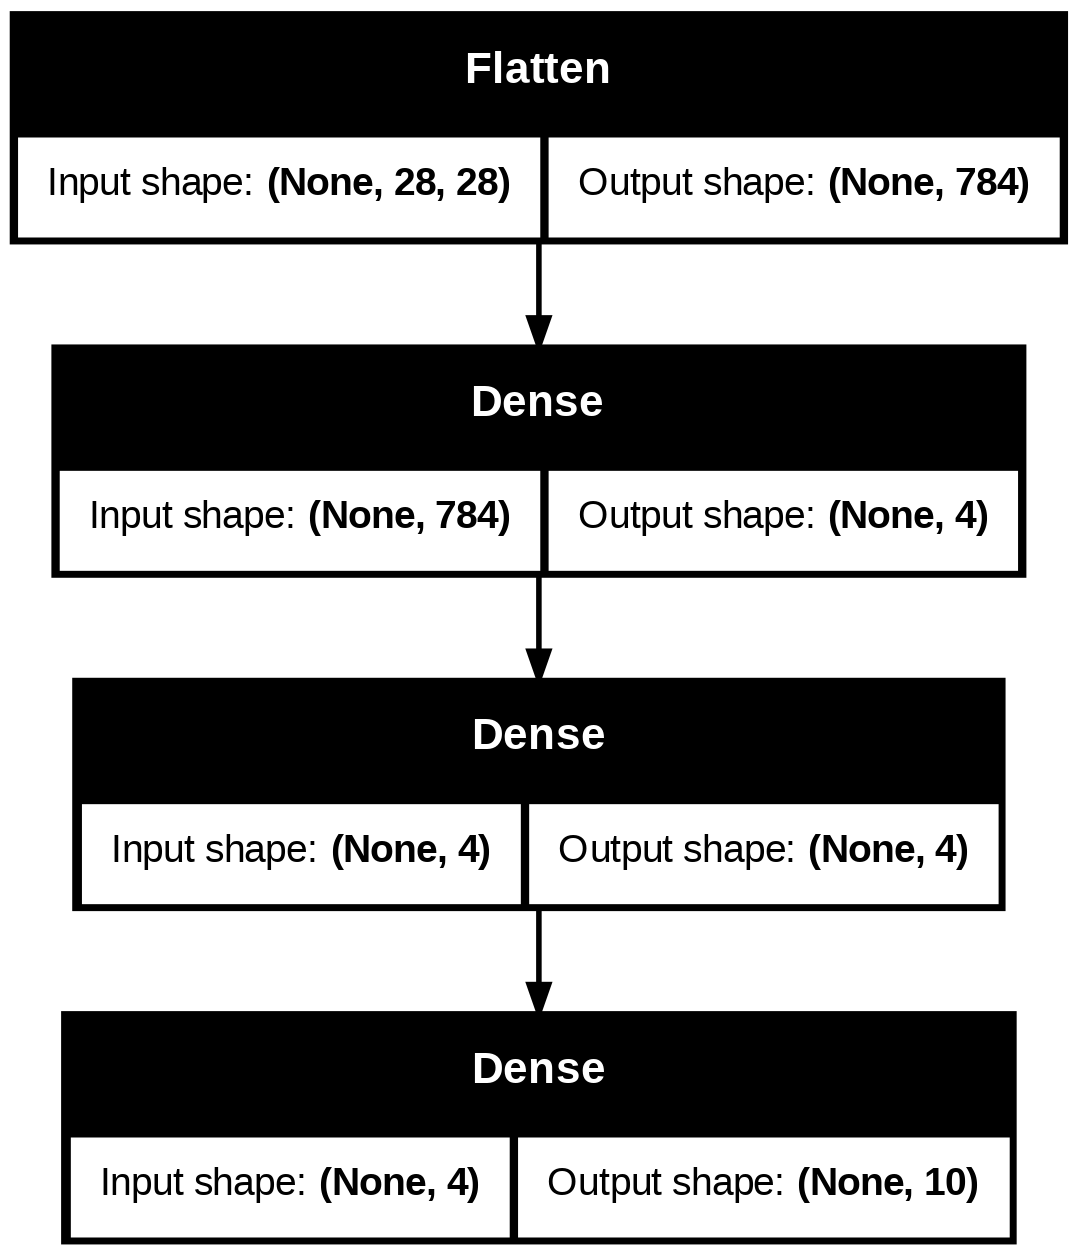

In [348]:
tf.keras.utils.plot_model(model_13, show_shapes=True)